# Bert Word Embeddings with NLU 

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture


## Sources :
- https://arxiv.org/abs/1810.04805
- https://github.com/google-research/bert

## Paper abstract

We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).

# 1. Install Java and NLU

In [1]:

import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  > /dev/null    




## 2. Load Model and embed sample string

In [2]:
import nlu
nlu.load('bert').predict('He was suprised by the diversity of NLU')

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


,token,bert_embeddings
origin_index,,
0,He,"[-2.1787030696868896, 0.7735092639923096, 0.07..."
0,was,"[-0.9244781136512756, 0.8572152256965637, -0.2..."
0,suprised,"[-0.6023581624031067, -0.03248432278633118, -0..."
0,by,"[-1.1537775993347168, 1.181339144706726, 0.517..."
0,the,"[-1.0956398248672485, 1.2275679111480713, 0.09..."
0,diversity,"[-1.4506101608276367, 0.07174962759017944, 0.1..."
0,of,"[-0.7573122978210449, 0.5711507201194763, 0.13..."
0,NLU,"[-1.3957836627960205, -0.3987855911254883, 0.3..."


# 2.1 Download Sample dataset

In [3]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-09-21 09:28:40--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.33.142
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.33.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  45.9MB/s    in 5.2s    

2020-09-21 09:28:45 (46.7 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


# 3. Visualize Embeddings with T-SNE




Lets add Sentiment, Part Of Speech and emotion to our pipeline because its so easy and so we can hue our T-SNE plots by POS and Sentiment       

In [4]:
pipe = nlu.load('pos sentiment emotion bert')

# We must set output level to token since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df[['comment','label']].iloc[0:1000], output_level='token')
predictions

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]
analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 20.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


,token,text,sentence_detector@sentiment,label,sentence_embeddings,emotion_confidence,document_assembler@sentiment,sentiment,pos,emotion,checked,sentiment_confidence,bert_embeddings
origin_index,,,,,,,,,,,,,
0,NC,NC and NH.,[NC and NH.],0,"[[-0.06570463627576828, -0.03522053360939026, ...",0.972704,[NC and NH.],negative,NNP,surprise,NC,0.522900,"[-1.4623265266418457, 1.3096604347229004, -0.4..."
0,and,NC and NH.,[NC and NH.],0,"[[-0.06570463627576828, -0.03522053360939026, ...",0.972704,[NC and NH.],negative,CC,surprise,and,0.522900,"[-1.0246961116790771, 0.7884305715560913, -0.6..."
0,NH,NC and NH.,[NC and NH.],0,"[[-0.06570463627576828, -0.03522053360939026, ...",0.972704,[NC and NH.],negative,NNP,surprise,NH,0.522900,"[-1.454894781112671, 0.6408094167709351, -0.98..."
0,.,NC and NH.,[NC and NH.],0,"[[-0.06570463627576828, -0.03522053360939026, ...",0.972704,[NC and NH.],negative,.,surprise,.,0.522900,"[-0.4392947256565094, 0.8077086210250854, -0.3..."
1,You,You do know west teams play against west teams...,[You do know west teams play against west team...,0,"[[-0.0254225991666317, 0.05448468029499054, -0...",0.999838,[You do know west teams play against west team...,negative,PRP,fear,You,0.473300,"[-1.1534708738327026, 0.9713523387908936, -0.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,crowd,"yeah, god forbid jesse look out for his fans b...","[yeah, god forbid jesse look out for his fans ...",1,"[[0.049849480390548706, -0.054164644330739975,...",0.953047,"[yeah, god forbid jesse look out for his fans ...",negative,NN,sadness,crowd,0.478800,"[-2.2023324966430664, -0.6649513840675354, 0.2..."
998,.,"yeah, god forbid jesse look out for his fans b...","[yeah, god forbid jesse look out for his fans ...",1,"[[0.049849480390548706, -0.054164644330739975,...",0.953047,"[yeah, god forbid jesse look out for his fans ...",negative,.,sadness,.,0.478800,"[-0.5554779767990112, 0.28269845247268677, 0.1..."
999,Beer,Beer city USA,[Beer city USA],0,"[[-0.050827838480472565, -0.045025844126939774...",0.883565,[Beer city USA],na,NNP,joy,Beer,0.000000,"[-2.1077029705047607, -0.3294370472431183, -0...."


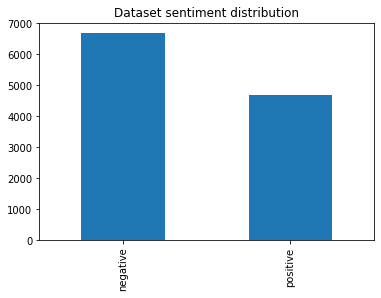

In [5]:
# Some Tokens are None which we must drop first
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.sentiment!= 'na']
predictions.sentiment.value_counts().plot.bar(title='Dataset sentiment distribution')

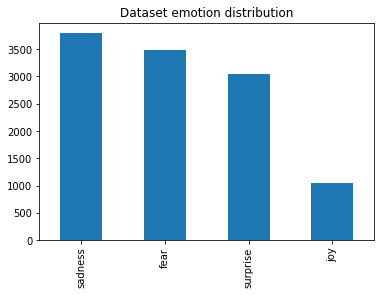

In [6]:
# Some Tokens are None which we must drop first
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.emotion!= 'na']

predictions.emotion.value_counts().plot.bar(title='Dataset emotion distribution')


# 3.1 Prepare data for T-SNE algorithm.
We create a Matrix with one row per Embedding vector for T-SNE algorithm

In [7]:
import numpy as np
# We first create a column of type np array
predictions['np_array'] = predictions.bert_embeddings.apply(lambda x: np.array(x))
# Make a matrix from the vectors in the np_array column via list comprehension
mat = np.matrix([x for x in predictions.np_array])


# 3.2 Fit and transform T-SNE algorithm


In [8]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (11368, 2)


## Set plotting styles

In [9]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)
from matplotlib import pyplot as plt


# 3.3 Plot low dimensional data with hue for POS


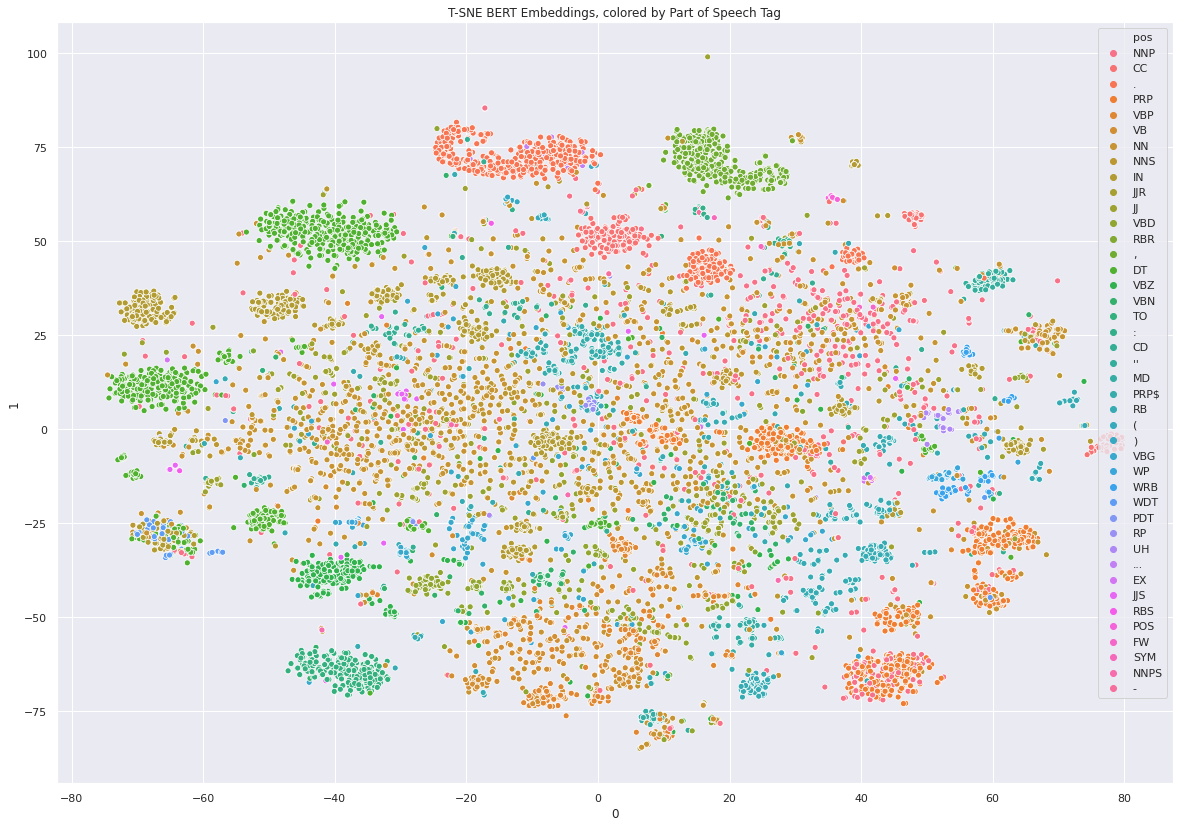

In [10]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.pos)
ax = sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Part of Speech Tag')
plt.savefig('pos.png')


# Plot low dimensional data with hue for Sarcasm


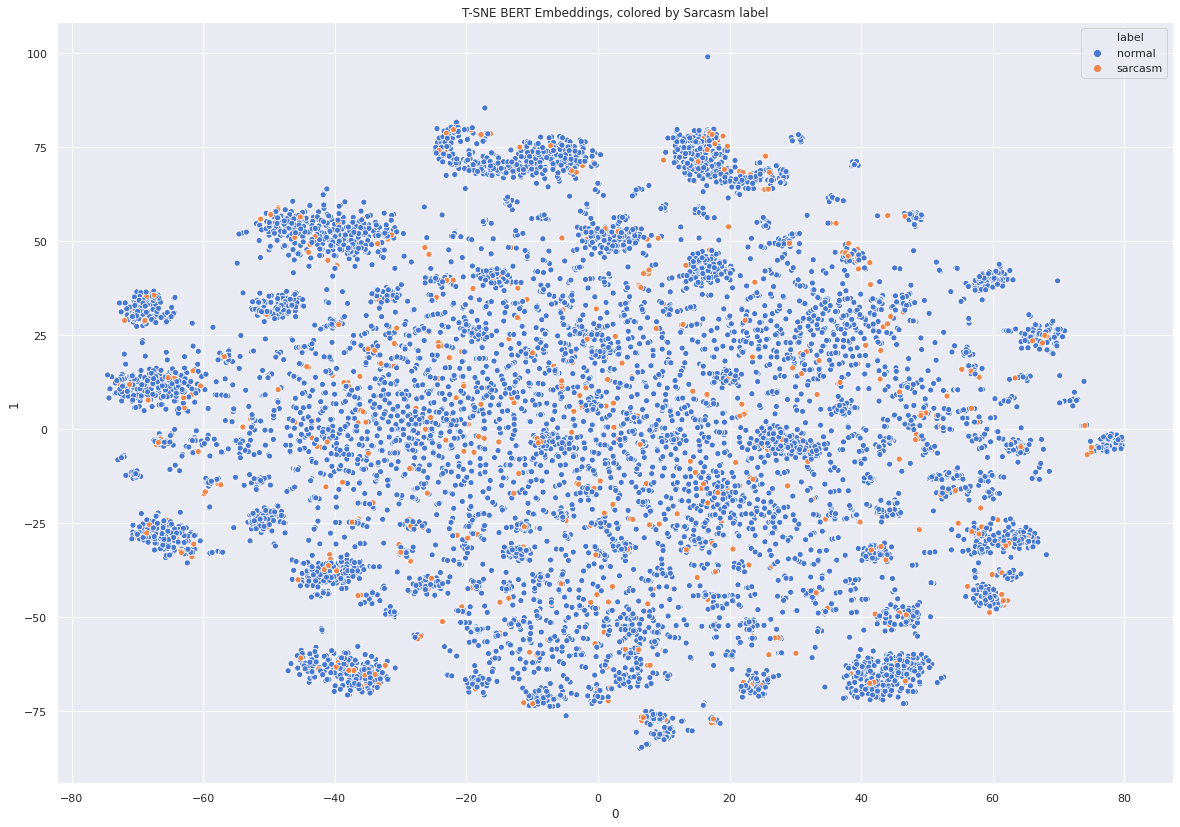

In [11]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.label.replace({1:'sarcasm',0:'normal'}))
ax = sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Sarcasm label')

plt.savefig('sarcasm.png')


# Plot low dimensional data with hue for Sentiment


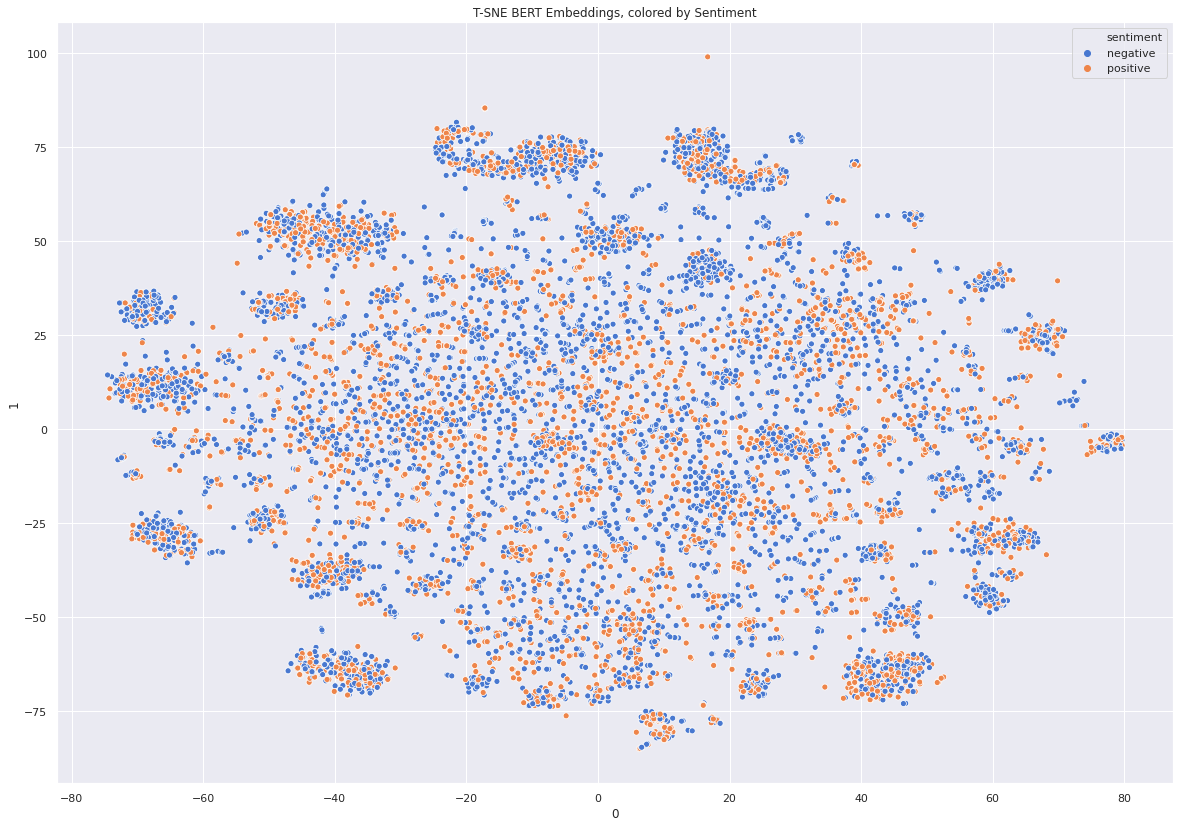

In [12]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
ax =  sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Sentiment')
plt.savefig('sentiment.png')


# Plot low dimensional data with hue for Emotion


Text(0.5, 1.0, 'T-SNE BERT Embeddings, colored by Emotion')

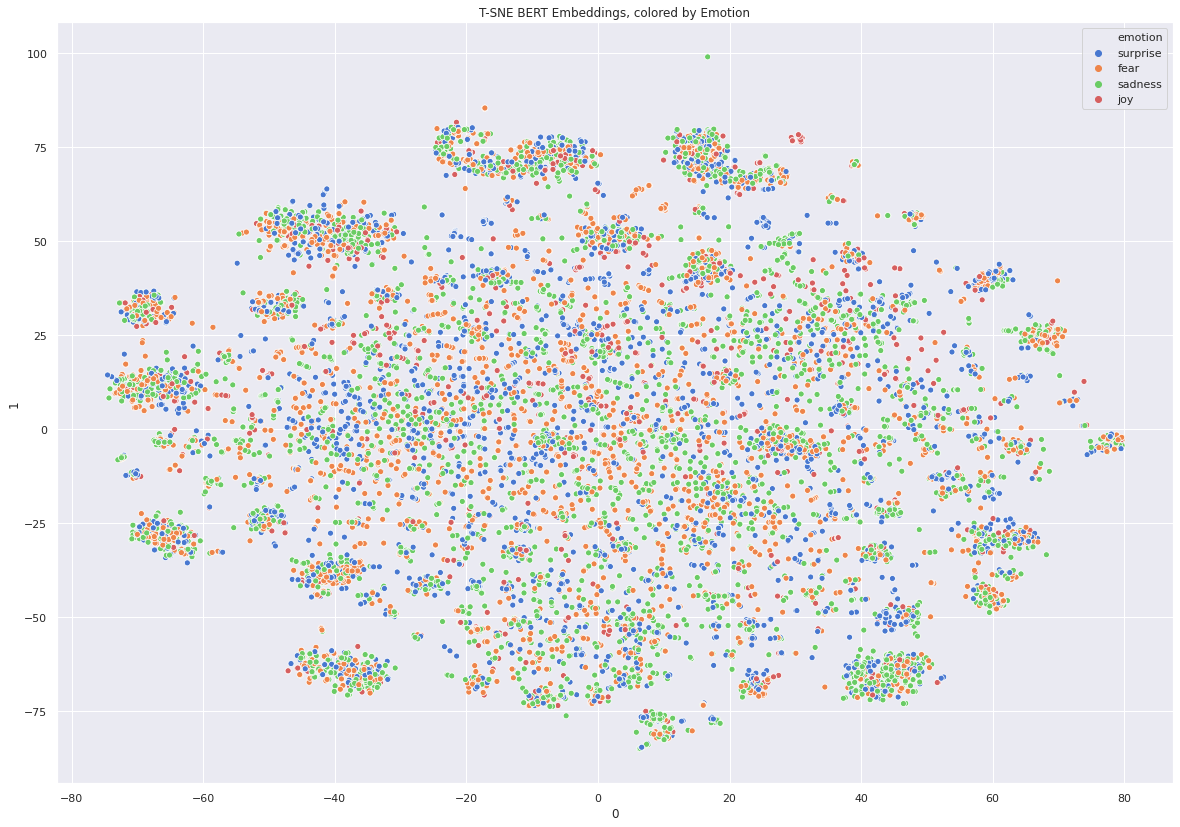

In [13]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.emotion)
ax =  sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Emotion')


# 4. NLU has many more bert word embeddings!

Make sure to try them all out!       
You can change 'bert' in nlu.load('bert') to bert, xlnet, albert or any other of the **100+ word embeddings** offerd by NLU

In [14]:
nlu.print_all_model_kinds_for_action('embed')

For language <en> NLU provides the following Models : 
nlu.load('en.embed') returns Spark NLP model glove_100d
nlu.load('en.embed.glove') returns Spark NLP model glove_100d
nlu.load('en.embed.glove.100d') returns Spark NLP model glove_100d
nlu.load('en.embed.bert') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_uncased') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_cased') returns Spark NLP model bert_base_cased
nlu.load('en.embed.bert.large_uncased') returns Spark NLP model bert_large_uncased
nlu.load('en.embed.bert.large_cased') returns Spark NLP model bert_large_cased
nlu.load('en.embed.biobert') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_base_cased') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_large_cased') returns Spark NLP model biobert_pubmed_large_cased
nlu.load('en.embed.biobert.pmc_base_cased') returns Spark NLP model biobert_pmc_base_cased
nlu.lo